### Student Information
Name: 李書卉

Student ID: 109065702

GitHub ID: SHLee

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

## Part 1 - Take Home Exercises

In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [3]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
X_sample = X.sample(n=1000)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [6]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [7]:
import numpy as np
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [8]:
### Begin Assignment Here
X[X['category_name'] == "comp.graphics"][:10]

text  category  category_name
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1  comp.graphics
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1  comp.graphics
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1  comp.graphics
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1  comp.graphics
15  From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1  comp.graphics
23  From: d91-hes@tekn.hj.se (STEFAN HERMANSSON) S...         1  comp.graphics
24  From: mjw19@cl.cam.ac.uk (M.J. Williams) Subje...         1  comp.graphics
25  From: dstampe@psych.toronto.edu (Dave Stampe) ...         1  comp.graphics
39  From: g9134255@wampyr.cc.uow.edu.au (Coronado ...         1  comp.graphics
42  From: gwang@magnus.acs.ohio-state.edu (Ge Wang...         1  comp.graphics

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [9]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [10]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [11]:
# Answer here
# Even though all 6 records are technically missing values, .isnull() only counts 3 of them. 
# So we can see that np.nan, None, and not specifying a value returns True, 
# while 'NaN', 'None', and '' return False.
# This is probably because the latter 3 are strings, and therefore have a non-zero size.

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [12]:
# Answer here
# 1. The number of rows went from 2257 down to 1000.
# 2. The order of the rows changed.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

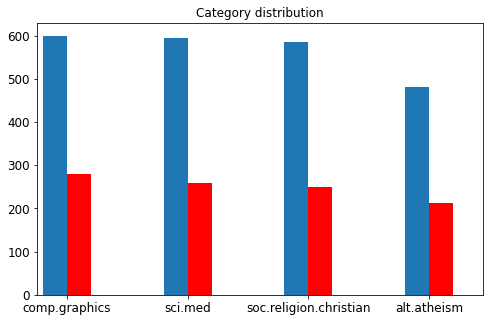

In [13]:
# Answer here
upper_bound = max(max(X.category_name.value_counts()), max(X_sample.category_name.value_counts())) + 30
X.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,5), width = 0.2,
                                           position = 1)
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,5), width = 0.2,
                                           position = 0,
                                           color = 'red')

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [14]:
# Answer here
count_vect.get_feature_names()[np.where(X_counts[4, 0:100].toarray() == 1)[1][1]]

'01'

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

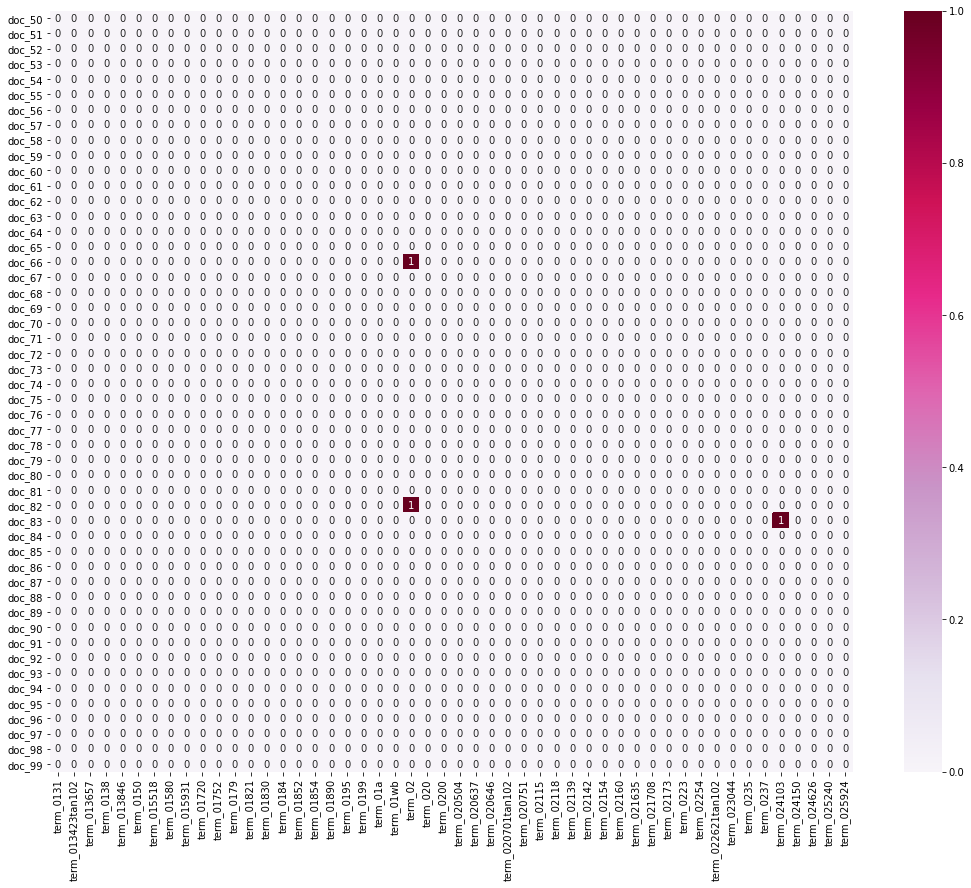

In [15]:
# Answer here
import seaborn as sns
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[50:100]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[50:100]]
plot_z = X_counts[50:100, 50:100].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(18, 14))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)


# Solution: downsample using sparse operations, ex: binning

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [16]:
# Answer here
X_reduced_3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced_3.shape

(2257, 3)

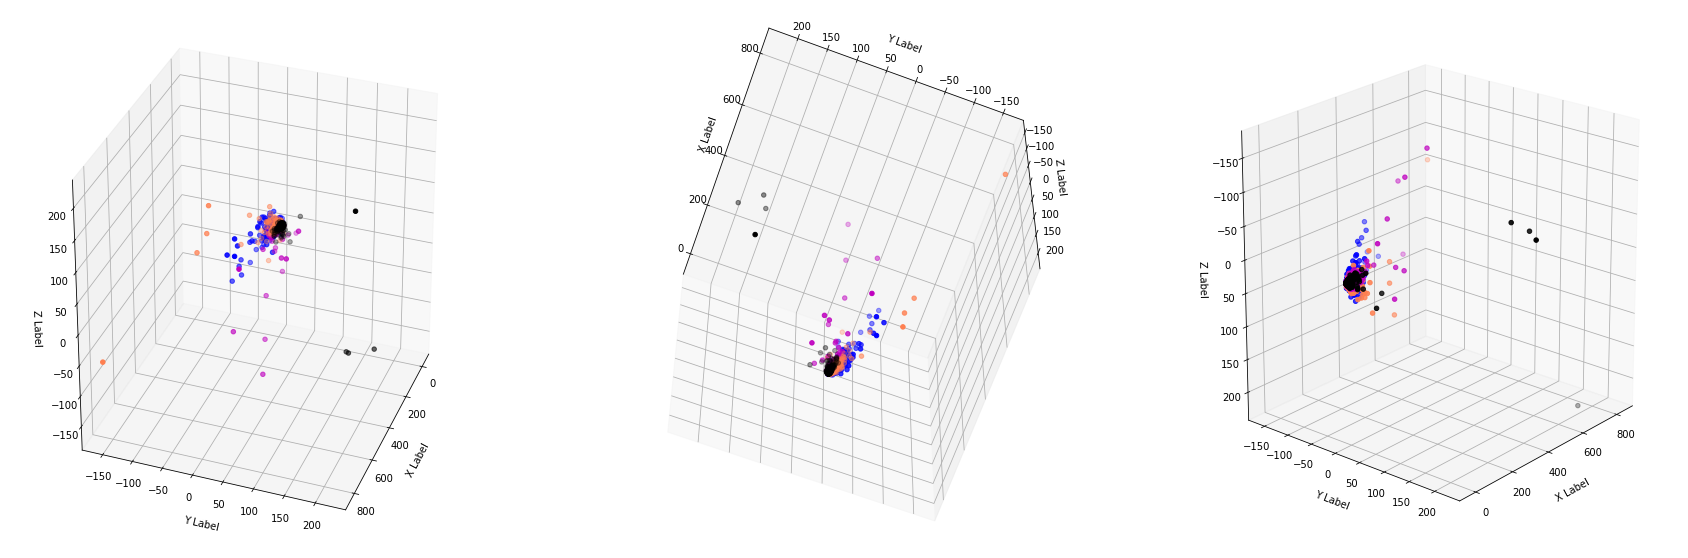

In [17]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (30,10))


def makeplot(pos, ele, angle):
    ax = fig.add_subplot(pos, projection='3d')
    for c, category in zip(col, categories):
        xs = X_reduced_3[X['category_name'] == category].T[0]
        ys = X_reduced_3[X['category_name'] == category].T[1]
        zs = X_reduced_3[X['category_name'] == category].T[2]

        ax.scatter(xs, ys, zs, c = c, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    ax.view_init(ele, angle)

ax1 = makeplot(131, 30, 20)
ax2 = makeplot(132, 120, 200)
ax3 = makeplot(133, 200, 320)
plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [18]:
# Answer here
import plotly.express as px
fig = px.bar(x=count_vect.get_feature_names()[:300], y=term_frequencies[:300])
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


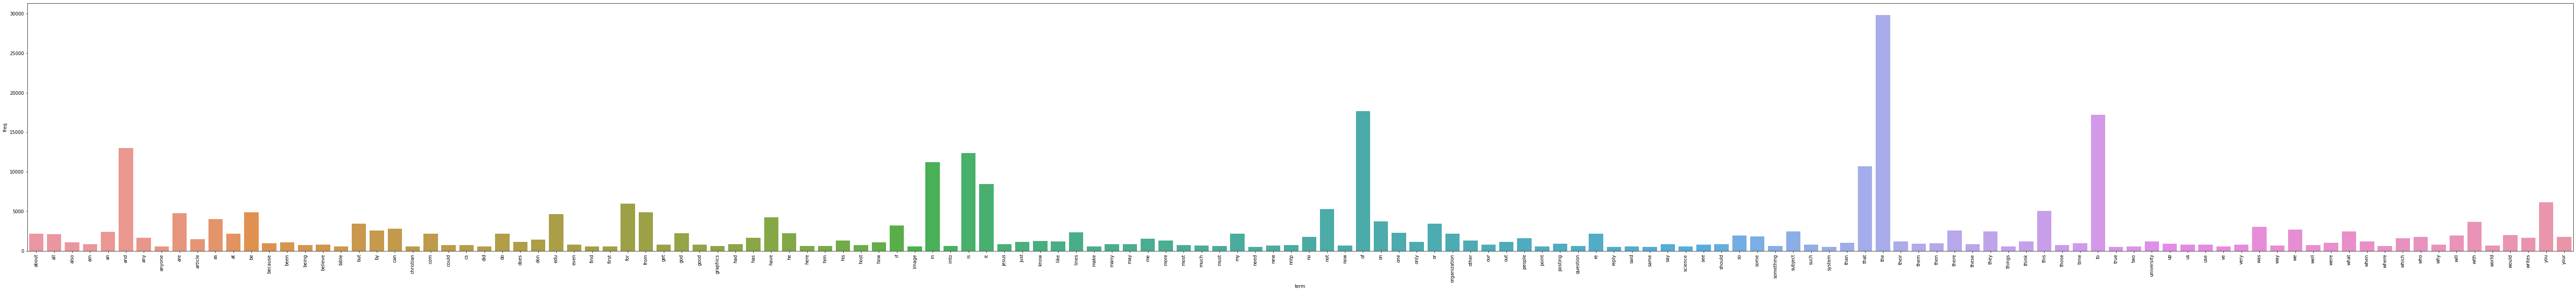

In [19]:
df = pd.DataFrame(list(zip(count_vect.get_feature_names(), term_frequencies)), columns =['term', 'freq'])
df_re = df.query("freq > 500")
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=df_re['term'], y=df_re['freq'])
g.set_xticklabels(df_re['term'], rotation = 90);

# Solution: Only show the more frequent terms (freqency > 500)

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

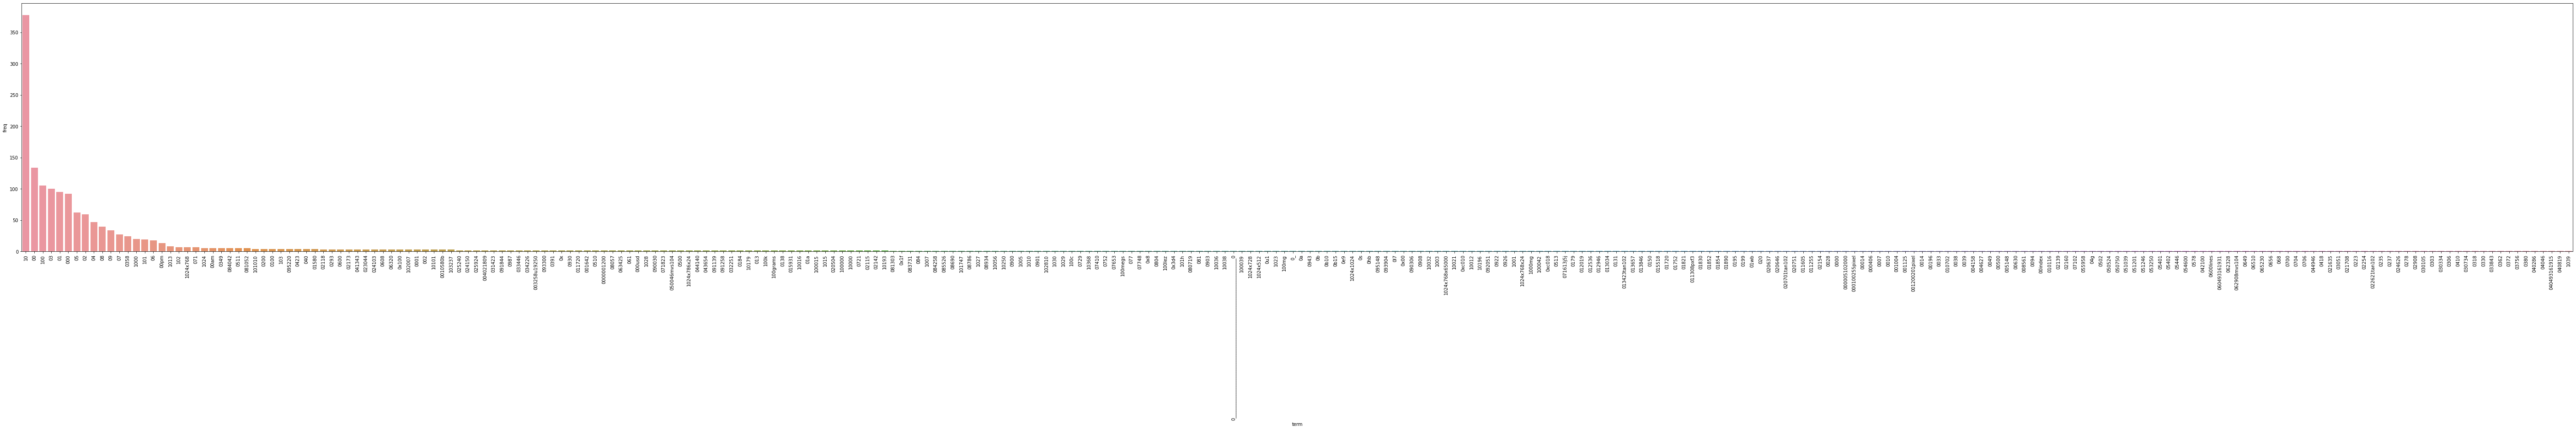

In [20]:
# Answer here
df_sort = df[:300].sort_values('freq', ascending=False)
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=df_sort['term'], y=df_sort['freq'])
g.set_xticklabels(df_sort['term'], rotation = 90);

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [21]:
# Answer here
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
mlb.classes_
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name bin_category_name  
0           comp.graphics      [0, 1, 0, 0]  
1           comp.graphics      [0, 1, 0, 0]  
2  soc.religion.christian      [0, 0, 0, 1]  
3  soc.religion.christian      [0, 0, 0, 1]  
4  soc.religion.christian      [0, 0, 0, 1]  
5  soc.religion.christian      [0, 0, 0, 1]  
6  soc.religion.christian      [0, 0, 0, 1]  
7                 sci.med      [0, 0, 1, 0]  
8                 sci.med      [0, 0, 1, 0]

## Part 2 - Same Tasks, New Dataset

### 2.1 Load data, remove missing & duplicate values

In [22]:
# Read all 3 files (yelp, amazon cells, imdb) and concatenate to create dataframe "reviews". 
f1 = pd.read_csv('data/yelp_labelled.txt', sep='\t', header = None)
f2 = pd.read_csv('data/amazon_cells_labelled.txt', sep='\t', header = None)
f3 = pd.read_csv('data/imdb_labelled.txt', sep='\t', header = None, quoting =3)
files = [f1, f2, f3]
reviews = pd.concat(files, ignore_index = True)
reviews.columns = ["sentence", "score"]
reviews

sentence  score
0                              Wow... Loved this place.      1
1                                    Crust is not good.      0
2             Not tasty and the texture was just nasty.      0
3     Stopped by during the late May bank holiday of...      1
4     The selection on the menu was great and so wer...      1
...                                                 ...    ...
2995  I just got bored watching Jessice Lange take h...      0
2996  Unfortunately, any virtue in this film's produ...      0
2997                   In a word, it is embarrassing.        0
2998                               Exceptionally bad!        0
2999  All in all its an insult to one's intelligence...      0

[3000 rows x 2 columns]

In [23]:
# Check for missing values. (None)
reviews.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               score
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0

In [24]:
# Check for duplicated data. (17)
sum(reviews.duplicated())

17

In [25]:
# Remove duplicates, keeping the first occurrence, and check new length.
reviews.drop_duplicates(keep="first", inplace=True)
len(reviews)

2983

### 2.2 Sampling

In [26]:
# 1000 samples from reviews
R_sample = reviews.sample(n=1000)
len(R_sample)

1000

0    1493
1    1490
Name: score, dtype: int64


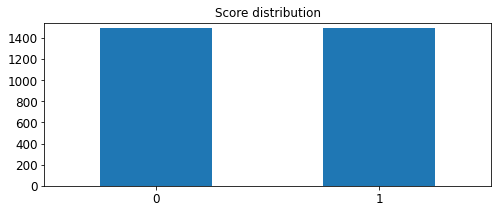

In [27]:
upper_bound = max(reviews.score.value_counts()) + 50
print(reviews.score.value_counts())

# plot barchart for reviews
reviews.score.value_counts().plot(kind = 'bar',
                                  title = 'Score distribution',
                                  ylim = [0, upper_bound], 
                                  rot = 0, fontsize = 12, figsize = (8,3))

1    517
0    483
Name: score, dtype: int64


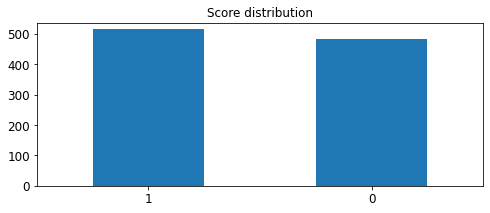

In [28]:
upper_bound = max(R_sample.score.value_counts()) + 20
print(R_sample.score.value_counts())

# plot barchart for R_sample
R_sample.score.value_counts().plot(kind = 'bar',
                                   title = 'Score distribution',
                                   ylim = [0, upper_bound], 
                                   rot = 0, fontsize = 12, figsize = (8,3))

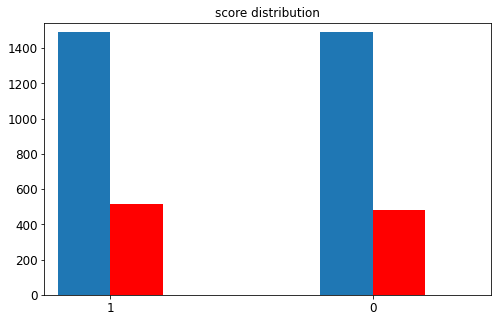

In [29]:
# side-by-side comparison of the distribution of review & R_sample
upper_bound = max(max(reviews.score.value_counts()), max(R_sample.score.value_counts())) + 50
reviews.score.value_counts().plot(kind = 'bar',
                                  title = 'score distribution',
                                  ylim = [0, upper_bound], 
                                  rot = 0, fontsize = 12, figsize = (8,5), width = 0.2,
                                  position = 1)
R_sample.score.value_counts().plot(kind = 'bar',
                                   title = 'score distribution',
                                   ylim = [0, upper_bound], 
                                   rot = 0, fontsize = 12, figsize = (8,5), width = 0.2,
                                   position = 0,
                                   color = 'red')

### 2.3

In [30]:
# Tokenize sentences as new column 'unigrams' 
reviews['unigrams'] = reviews['sentence'].apply(lambda x: dmh.tokenize_text(x))
reviews[:5]

sentence  score  \
0                           Wow... Loved this place.      1   
1                                 Crust is not good.      0   
2          Not tasty and the texture was just nasty.      0   
3  Stopped by during the late May bank holiday of...      1   
4  The selection on the menu was great and so wer...      1   

                                            unigrams  
0                  [Wow, ..., Loved, this, place, .]  
1                          [Crust, is, not, good, .]  
2  [Not, tasty, and, the, texture, was, just, nas...  
3  [Stopped, by, during, the, late, May, bank, ho...  
4  [The, selection, on, the, menu, was, great, an...

In [31]:
count_vect = CountVectorizer()
R_counts = count_vect.fit_transform(reviews.sentence)
R_counts.shape

(2983, 5155)

In [32]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(reviews[:1].sentence)))

['wow', 'loved', 'this', 'place']

In [33]:
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [34]:
# document-term matrix example
R_counts[0:5, 200:300].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

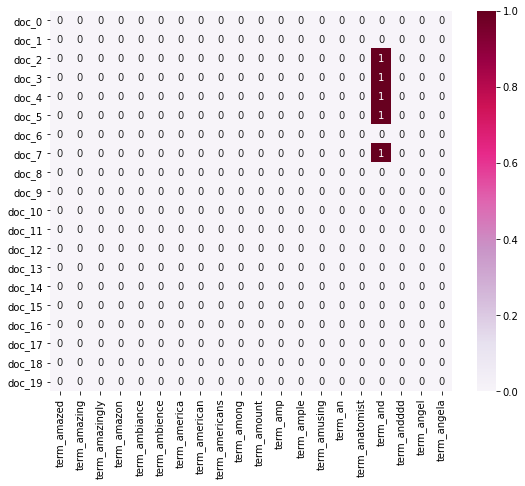

In [35]:
# heat map example
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[200:220]]
plot_y = ["doc_"+ str(i) for i in list(reviews.index)[0:20]]
plot_z = R_counts[0:20, 200:220].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [36]:
R_reduced = PCA(n_components = 2).fit_transform(R_counts.toarray())
R_reduced.shape

(2983, 2)

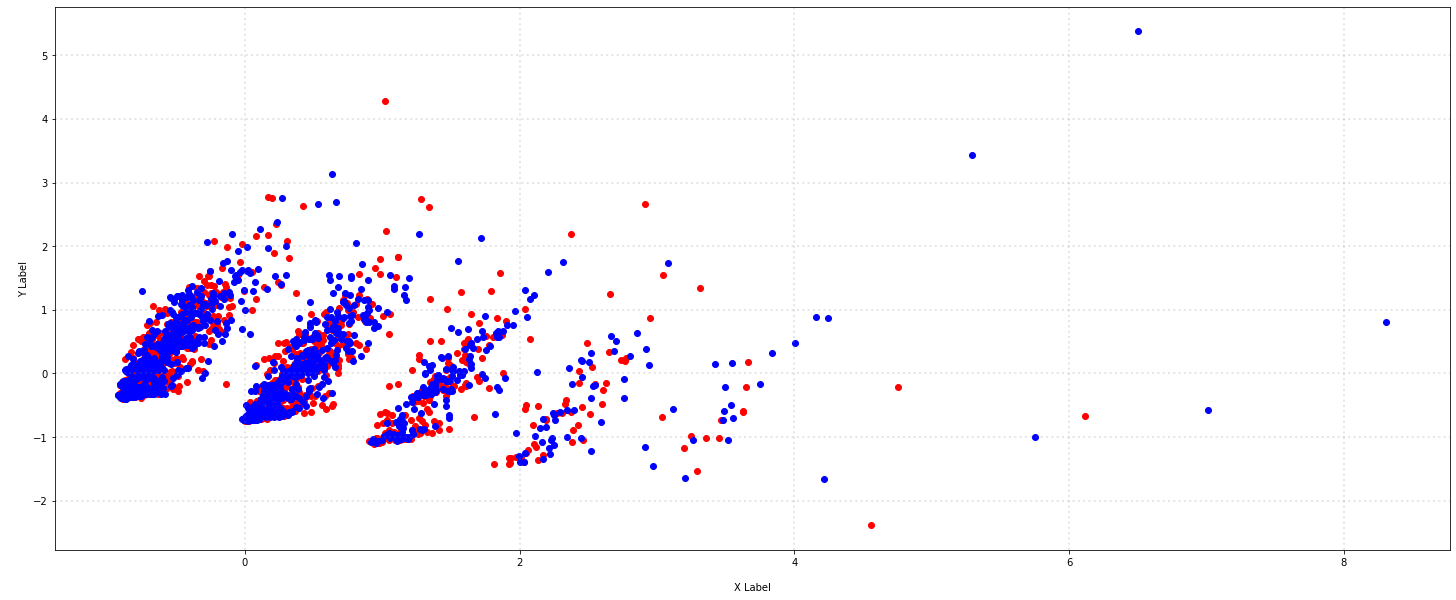

In [60]:
col = ['red', 'blue']
score = [0, 1]

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, score in zip(col, score):
    xs = R_reduced[reviews['score'] == score].T[0]
    ys = R_reduced[reviews['score'] == score].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

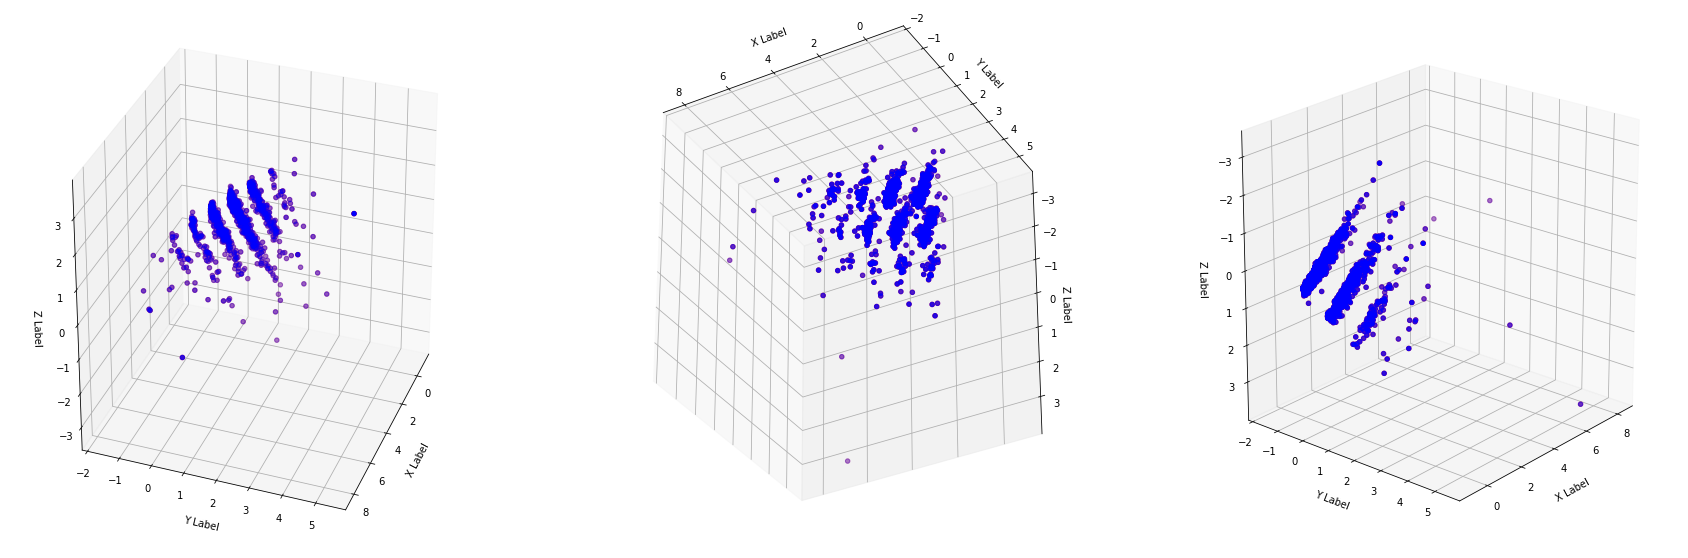

In [61]:
R_reduced_3 = PCA(n_components = 3).fit_transform(R_counts.toarray())

# plot
fig = plt.figure(figsize = (30,10))


def makeplot(pos, ele, angle):
    ax = fig.add_subplot(pos, projection='3d')
    for c, category in zip(col, categories):
        xs = R_reduced_3[reviews['score'] == score].T[0]
        ys = R_reduced_3[reviews['score'] == score].T[1]
        zs = R_reduced_3[reviews['score'] == score].T[2]
    
        ax.scatter(xs, ys, zs, c = c, marker='o')

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')
    ax.view_init(ele, angle)

ax1 = makeplot(131, 30, 20)
ax2 = makeplot(132, 150, 60)
ax3 = makeplot(133, 200, 320)
plt.show()

In [39]:
term_frequencies = []
for j in range(0,R_counts.shape[1]):
    term_frequencies.append(sum(R_counts[:,j].toarray()))

In [40]:
term_frequencies = np.asarray(R_counts.sum(axis=0))[0]

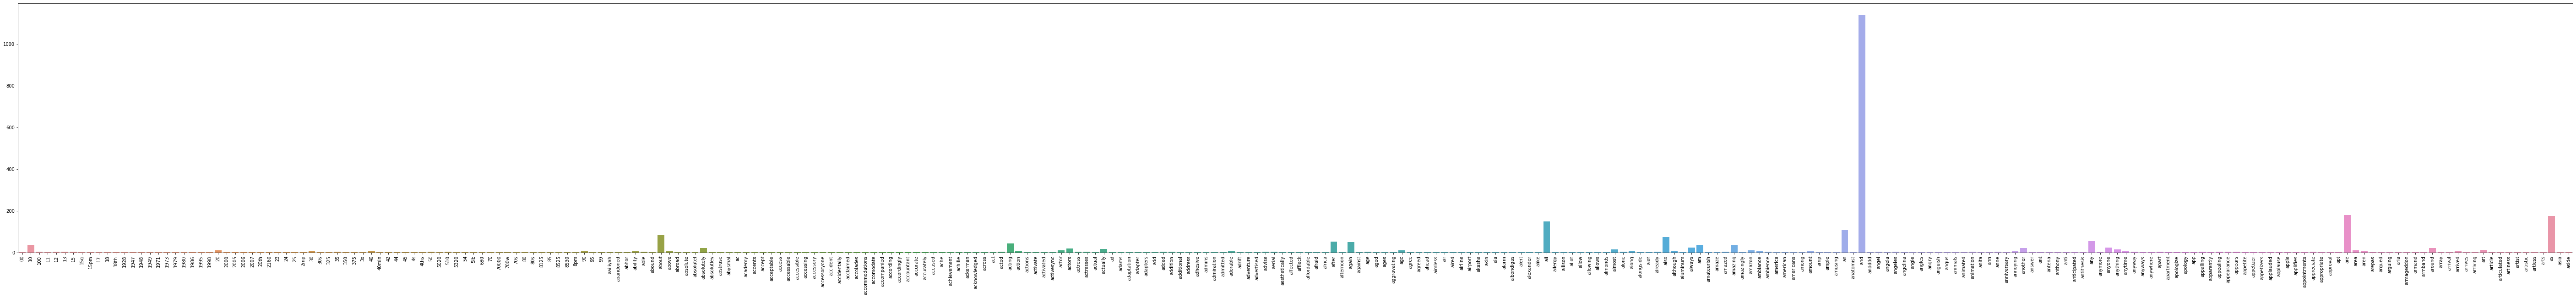

In [41]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

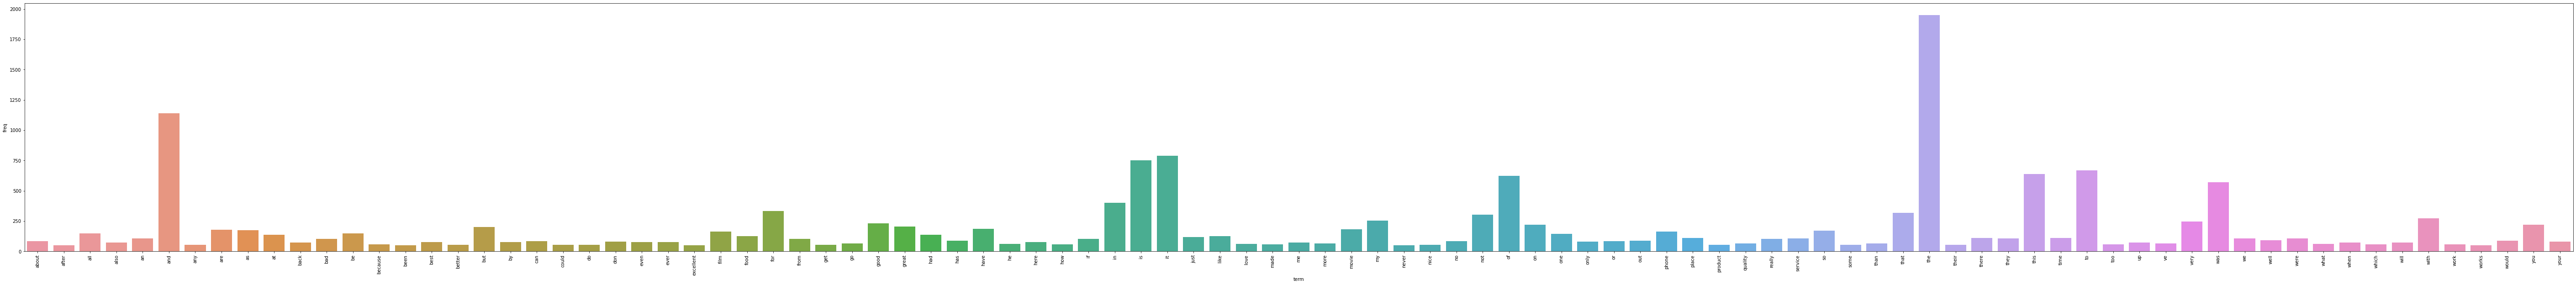

In [42]:
df = pd.DataFrame(list(zip(count_vect.get_feature_names(), term_frequencies)), columns =['term', 'freq'])
df_re = df.query("freq > 50")
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=df_re['term'], y=df_re['freq'])
g.set_xticklabels(df_re['term'], rotation = 90);

# Only show the more frequent terms (freqency > 50)

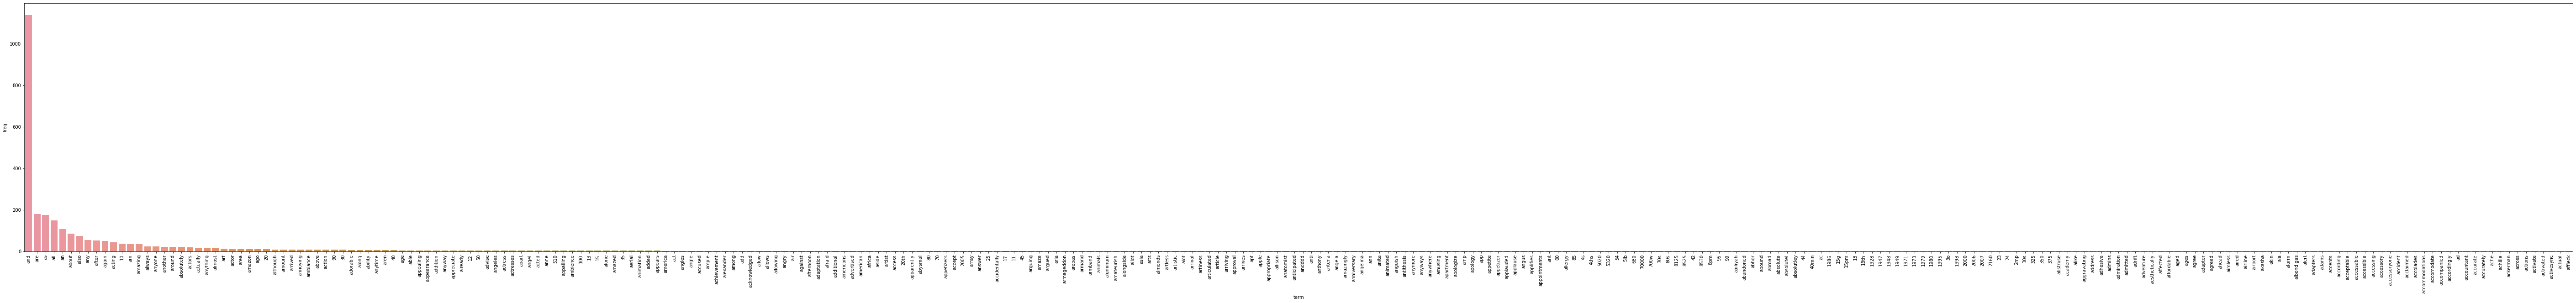

In [43]:
# Answer here
df_sort = df[:300].sort_values('freq', ascending=False)
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=df_sort['term'], y=df_sort['freq'])
g.set_xticklabels(df_sort['term'], rotation = 90);

In [53]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = reviews.iloc[100]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = reviews.iloc[1100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = reviews.iloc[2300]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['Our server was fantastic and when he found out the wife loves roasted garlic and bone marrow, he added extra to our meal and another marrow to go!']
['I received my supposedly new motorola 375 and apparently there was not a match between the phone and the charger.']
['It features an outlandish array of memorable, psychotic but lovable nuts.  ']


In [55]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [56]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.296078
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


## Part 3 - New Tasks, New Dataset

### 3.1 Meaningful new data visualizations
Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.

### 3.2 TF-IDF features
Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide .

### 3.3 Naive Bayes classifier
Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. Refer to this article.

## Part 4 - Observation

1. 
2. 
3. 